# Analyse data based "sirene_nice"

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
from trampact.analyse_ml_sirene import Machine_learning_sirene
import pandas as pd
import numpy as np

# import data clean

In [70]:
entreprise_df=Machine_learning_sirene.get_data_clean()

/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,81) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [71]:
entreprise_df.head(2)

,Unnamed: 0,SIREN,NIC,siret,Statut de diffusion de l'établissement,Date de création de l'établissement,effectifs,Année de la tranche d'effectif de l'établissement,Activité principale de l'établissement,Date de la dernière mise à jour de l'établissement,...,Classe de l'unité légale,SIRET du siège de l'unité légale,Nature juridique de l'unité légale,Première ligne de l'adressage,Date de fermeture de l'unité légale,Filename,y,x,distance tram t1,proche t1
0,0,337723027,13,33772302700013,O,1944-08-28,1,,67.04,1944-08-28,...,Debits de boissons (sans spectacle),33772302700013,Entrepreneur individuel,Monsieur MAX CHARASSE,1988-09-20,sirene_v3_42,43.700752,7.274309,286.18,oui
1,1,353509078,13,35350907800013,O,1990-01-15,1,,70.2C,1944-08-28,...,Commerce de gros de fruits et legumes,35350907800013,Société à responsabilité limitée (sans autre i...,BANAFRUIT,1944-08-28,sirene_v3_61,43.668033,7.208477,6538.89,non


In [5]:
# entreprise_df.dtypes.head(30)

# Année 2005==>2007

In [6]:
#liste feature pour l'encodage
feature_ml=[
            "Date de création de l'unité légale",
            "effectifs",
            "Classe de l'établissement",
            #"Nature juridique de l'unité légale",
            "proche t1"
            ]



## Onehot encoder

In [7]:
#y="proche t1"
#X=le reste
y_encoder, X_encoder, list_y_encoder, list_X_encoder=Machine_learning_sirene.encoder_feature(feature_ml,\
                                                                                             filtre_date=True,\
                                                                                             date_debut=2005,date_end=2007)


/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/lewagon/code/eangelid/trampact/trampact/analyse_ml_sirene.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entreprise_ml_df["Date de création de l'unité légale"]=\


### Encoder X

In [8]:
X_encoder

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [9]:
X_encoder.shape

(19040, 562)

In [10]:
list_X_encoder

[1,
 2,
 4,
 8,
 15,
 35,
 75,
 150,
 225,
 375,
 750,
 'Accueil de jeunes enfants',
 'Accueil des personnes agees',
 'Action sociale sans hebergement n.c.a.',
 'Activite des economistes de la construction',
 'Activite des geometres',
 'Activite des medecins generalistes',
 'Activites artistiques',
 'Activites chirurgicales',
 'Activites combinees de soutien lie aux batiments',
 'Activites comptables',
 "Activites d'architecture",
 "Activites d'enquete",
 "Activites de centres d'appels",
 'Activites de clubs de sports',
 'Activites de conditionnement',
 'Activites de nettoyage',
 'Activites de pre-presse',
 'Activites de radio',
 'Activites de radiodiagnostic et de radiotherapie',
 'Activites de sante humaine non classees ailleurs',
 'Activites de securite privee',
 "Activites de soutien a l'enseignement",
 'Activites de soutien a la production animale',
 'Activites de soutien au spectacle vivant',
 'Activites de soutien aux cultures',
 "Activites des agences de placement de main-d'œuv

In [11]:
len(list_X_encoder)

562

### Encoder y

In [12]:
y_encoder

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [13]:
 list_y_encoder

['non', 'oui']

## Model baseline

In [14]:
valeur_proche_t1=pd.DataFrame(y_encoder).value_counts()
valeur_proche_t1

0.0    10679
1.0     8361
dtype: int64

In [15]:
Model_baseline=valeur_proche_t1[1]/(valeur_proche_t1[0]+valeur_proche_t1[1])
Model_baseline

0.4391281512605042

## Logistic regression

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                    X_encoder, y_encoder, test_size=0.3)

In [62]:
from sklearn.linear_model import LogisticRegression
# Instanciate the model
model = LogisticRegression()
# # Train the model on the Training data
model.fit(X_train, y_train)

/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
model.coef_

array([[ 1.89787778e-01,  3.67712806e-01,  4.16754058e-01,
         6.36228848e-01,  1.08639857e-01, -6.78041382e-02,
        -9.39248851e-01, -9.30287601e-01, -1.62902557e-01,
         2.53783264e-01, -1.55894556e-01, -3.72025838e-01,
         2.01640155e-01,  3.09909949e-01,  6.86875920e-01,
        -1.25149263e-01, -5.29718718e-01, -2.65240228e-01,
        -2.04311440e-01,  1.47347756e-01, -5.17324371e-02,
        -2.97861814e-01, -1.83407770e-01, -5.67872554e-01,
         1.74573024e-01, -1.84598849e-01,  2.90470963e-01,
        -4.82749707e-01,  5.85064250e-01, -5.67872554e-01,
        -3.61376309e-01,  4.25097278e-01, -3.05321088e-01,
         4.21811074e-02,  1.28004755e-02,  8.70021566e-01,
        -1.19434359e+00,  6.89819321e-01,  9.03108385e-03,
        -1.00997431e-01,  1.66927157e-01, -7.50371436e-02,
         0.00000000e+00,  4.25097278e-01, -3.18376383e-01,
         4.18255320e-01, -2.23093359e-01,  1.53349851e-01,
         1.73576158e-01, -3.23002516e-01, -1.52906576e-0

In [64]:
model.coef_.shape

(1, 481)

In [65]:
model.score(X_test, y_test)

0.591228796028134

In [66]:
coef_2007=pd.DataFrame(model.coef_,columns=list_X_encoder).sort_values(by=0,axis=1, ascending=False)
coef_2007

,Edition et diffusion de programmes radio,Debits de boissons,Commerce de detail de la chaussure,Commerce de detail d'articles d'horlogerie et de bijouterie en magasin specialise,Travaux de demolition,Autres intermediations monetaires,Enseignement de la conduite,Activites juridiques,Administration publique generale,Superettes,...,Commerce de gros (commerce interentreprises) d'autres produits intermediaires,Culture de la vigne,Commerce de gros (commerce interentreprises) d'autres machines et equipements de bureau,Autres cultures non permanentes,Promotion immobiliere de logements,Ambulances,Activites des agences de travail temporaire,Transports maritimes et cotiers de fret,Production d'electricite,"Culture de legumes, de melons, de racines et de tubercules"
0,1.49838,1.43031,1.335925,1.219534,1.209702,1.198875,1.197181,1.187875,1.145083,1.140518,...,-1.002413,-1.00336,-1.084405,-1.084405,-1.109151,-1.184079,-1.194344,-1.201866,-1.29009,-1.781294


In [67]:
coef_top=coef_2007.iloc[0,:20]
coef_top


Edition et diffusion de programmes radio                                                                       1.498380
Debits de boissons                                                                                             1.430310
Commerce de detail de la chaussure                                                                             1.335925
Commerce de detail d'articles d'horlogerie et de bijouterie en magasin specialise                              1.219534
Travaux de demolition                                                                                          1.209702
Autres intermediations monetaires                                                                              1.198875
Enseignement de la conduite                                                                                    1.197181
Activites juridiques                                                                                           1.187875
Administration publique generale        

<AxesSubplot:>

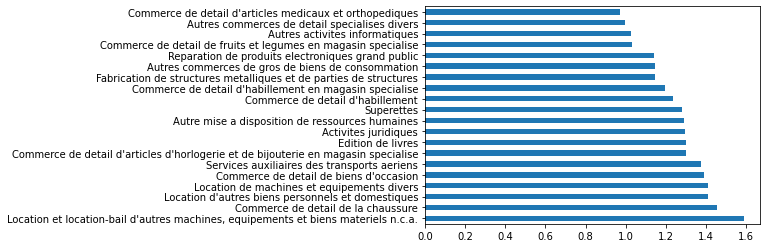

In [23]:
coef_top.plot.barh()


In [24]:
# import matplotlib.pyplot as plt
# # plot top
# # plot param
# nbr_value=len(coef_top.index.tolist())
# plt.figure(figsize=(10, 5))
# plt.ylabel("Coefficient magnitude")
# plt.xticks(np.arange(1,  1+ nbr_value),
#             coef_top.index, rotation=60,
#             ha="right")
# #plot
# plt.bar(np.arange(1,1+ nbr_value), coef_top.values,color="blue")

In [25]:
coef_bad=coef_2007.iloc[0,-8:]
coef_bad

Services funeraires                                                 -0.999759
Activites des agences de travail temporaire                         -1.001803
Commerce de detail non alimentaire sur eventaires et marches        -1.030265
Travaux de menuiserie metallique et serrurerie                      -1.097071
Travaux de platrerie                                                -1.127795
Commerce de gros (commerce interentreprises) de fruits et legumes   -1.272112
Organisation de foires et salons                                    -1.301785
Culture de legumes, de melons, de racines et de tubercules          -1.428375
Name: 0, dtype: float64

<AxesSubplot:>

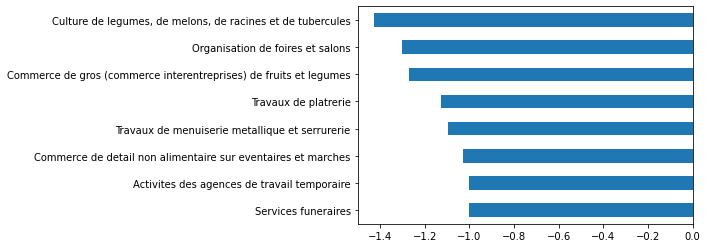

In [26]:
coef_bad.plot.barh()

In [27]:
# # plot bad
# # plot param
# nbr_value=len(coef_bad.index.tolist())
# plt.figure(figsize=(10, 5))
# plt.ylabel("Coefficient magnitude")
# plt.xticks(np.arange(1,  1+ nbr_value),
#             coef_bad.index, rotation=60,
#             ha="right")
# #plot
# plt.bar(np.arange(1,1+ nbr_value), coef_bad.values,color="red")

In [28]:
# #Méthode direct pour trajet le plot
# coef.iloc[0,:10].plot.bar()

### Learning curve==> Hors sujet

In [29]:
# train_sizes=[]
# nbre_cv=5
# nbre_data=round(len(X_encoder)*1/nbre_cv)
# subdivision=round(nbre_data/10)
# test=0
# for i in range(1, 10):
#     test=i*subdivision
#     train_sizes.append(test)
# train_sizes.append(nbre_data)
# train_sizes[::1]

In [30]:
# from sklearn.model_selection import learning_curve


# # Get train scores (accurance), train sizes, and validation scores using `learning_curve`
# train_sizes, train_scores, test_scores = learning_curve(
#     estimator=LogisticRegression(), X=X_encoder, y=y_encoder, train_sizes=train_sizes, cv=nbre_cv)

In [31]:
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_mean

In [32]:
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_mean

In [33]:
# plt.plot(train_sizes, train_scores_mean, label = 'Training score')
# plt.plot(train_sizes, test_scores_mean, label = 'Test score')
# plt.ylabel('accurance', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves', fontsize = 18, y = 1.03)
# plt.legend()

### Selecting the Most Important Features

In [34]:
# # Permutation Importance
# from sklearn.inspection import permutation_importance

In [35]:
# n_repeats=15

In [36]:
# # Fit model
# model = LogisticRegression()
# model.fit(X_train, y_train) 

# # Perform Permutation
# permutation_score = permutation_importance(model, X_train, y_train, n_repeats=15) 



In [37]:
# # Unstack results
# importance_df = pd.DataFrame(np.vstack((list_X_encoder,
#                                         permutation_score.importances_mean)).T) 
# importance_df.columns=['feature','score decrease']


# # # Order by importance
# most_important_features = importance_df.sort_values(by="score decrease", ascending = False)
# most_important_features.head(10)

# Année 2008==>20012

## Onehot encoder

In [38]:
#y="proche t1"
#X=le reste
y_encoder, X_encoder, list_y_encoder, list_X_encoder=Machine_learning_sirene.encoder_feature(feature_ml,\
                                                                                             filtre_date=True,\
                                                                                             date_debut=2008,date_end=2012)


/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/lewagon/code/eangelid/trampact/trampact/analyse_ml_sirene.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entreprise_ml_df["Date de création de l'unité légale"]=\


### Encoder X

In [39]:
X_encoder

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [40]:
X_encoder.shape

(40283, 481)

In [41]:
list_X_encoder

[1,
 2,
 4,
 8,
 15,
 35,
 75,
 150,
 375,
 3500,
 'Accueil de jeunes enfants',
 "Accueil ou accompagnement sans hebergement d'adultes handicapes ou de personnes agees",
 'Action sociale sans hebergement n.c.a.',
 'Activite des economistes de la construction',
 'Activite des geometres',
 'Activite des medecins generalistes',
 'Activites chirurgicales',
 'Activites combinees de soutien lie aux batiments',
 'Activites comptables',
 "Activites d'architecture",
 "Activites d'enquete",
 "Activites de centres d'appels",
 'Activites de clubs de sports',
 'Activites de conditionnement',
 'Activites de pre-presse',
 'Activites de radiodiagnostic et de radiotherapie',
 'Activites de sante humaine non classees ailleurs',
 'Activites de securite privee',
 "Activites de soutien a l'enseignement",
 'Activites de soutien a la production animale',
 'Activites de soutien au spectacle vivant',
 'Activites de soutien aux cultures',
 "Activites des agences de placement de main-d'œuvre",
 'Activites des ag

In [42]:
len(list_X_encoder)

481

### Encoder y

In [43]:
y_encoder

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [44]:
 list_y_encoder

['non', 'oui']

## Model baseline

In [45]:
valeur_proche_t1=pd.DataFrame(y_encoder).value_counts()
valeur_proche_t1

0.0    22619
1.0    17664
dtype: int64

In [46]:
Model_baseline=valeur_proche_t1[1]/(valeur_proche_t1[0]+valeur_proche_t1[1])
Model_baseline

0.43849762927289426

## Logistic regression

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                    X_encoder, y_encoder, test_size=0.3)

In [48]:
from sklearn.linear_model import LogisticRegression
# Instanciate the model
model = LogisticRegression()
# # Train the model on the Training data
model.fit(X_train, y_train)

/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.coef_

array([[ 0.04051218,  0.17249342,  0.29526805,  0.60019633, -0.01603917,
         0.10823863, -0.7258693 , -0.86698895,  0.04740364,  0.26045571,
        -0.21170786, -0.05725275,  0.07166217,  0.38619631,  0.34138771,
        -0.11487898, -0.44692016, -0.11929596, -0.11893543,  0.13989379,
         0.22619372, -0.47853407, -0.27228715, -0.941566  ,  0.41598924,
         0.37623029,  0.34350518, -0.69747765,  0.43014847,  0.        ,
        -0.10039426,  0.07807023, -0.56513576,  0.04856455,  0.02068718,
         1.38421504, -0.88830053,  0.59089607,  0.03627024,  0.27864217,
         0.175393  , -0.08595531, -0.32369703,  0.        , -0.32369703,
        -0.16375699,  0.11260572,  0.15840011,  0.11376912, -0.23293678,
        -0.30440747,  1.18191004, -0.02226686, -0.47585726, -0.17305216,
         1.09216484, -1.46210523,  0.02996474,  0.03793913, -0.37964778,
        -0.78487727, -0.11677066, -0.59618241,  0.03406392, -0.62848384,
         1.00149955, -0.40404724, -0.30166348, -0.0

In [50]:
model.coef_.shape

(1, 481)

In [51]:
model.score(X_test, y_test)

0.5851055026892842

In [52]:
coef_2008=pd.DataFrame(model.coef_,columns=list_X_encoder).sort_values(by=0,axis=1, ascending=False)
coef_2008

,Reparation de chaussures et d'articles en cuir,Commerce de detail de la chaussure,Activites des agences de recouvrement de factures et des societes d'information financiere sur la clientele,Reparation de meubles et d'equipements du foyer,Debits de boissons,Reparation d'articles d'horlogerie et de bijouterie,Activites des syndicats de salaries,Autres intermediations monetaires,Commerce de detail d'habillement en magasin specialise,Commerce de detail d'articles d'horlogerie et de bijouterie en magasin specialise,...,Activites de conditionnement,Installation de machines et equipements mecaniques,Fabrication de charpentes et d'autres menuiseries,Commerce de gros (commerce interentreprises) de composants et d'equipements electroniques et de telecommunication,Travaux d'isolation,Autres cultures non permanentes,Production de films pour le cinema,Production d'electricite,Activites liees aux systemes de securite,"Culture de legumes, de melons, de racines et de tubercules"
0,1.717137,1.670057,1.384215,1.22228,1.221813,1.206977,1.18191,1.179141,1.102863,1.098174,...,-0.941566,-0.956244,-0.970752,-1.077865,-1.077865,-1.090706,-1.12854,-1.249352,-1.462105,-1.865713


In [53]:
coef_top=coef_2008.iloc[0,:20]
coef_top


Reparation de chaussures et d'articles en cuir                                                                 1.717137
Commerce de detail de la chaussure                                                                             1.670057
Activites des agences de recouvrement de factures et des societes d'information financiere sur la clientele    1.384215
Reparation de meubles et d'equipements du foyer                                                                1.222280
Debits de boissons                                                                                             1.221813
Reparation d'articles d'horlogerie et de bijouterie                                                            1.206977
Activites des syndicats de salaries                                                                            1.181910
Autres intermediations monetaires                                                                              1.179141
Commerce de detail d'habillement en maga

<AxesSubplot:>

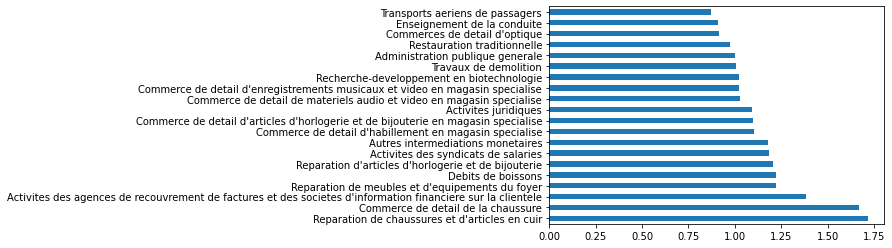

In [54]:
coef_top.plot.barh()

In [55]:
# import matplotlib.pyplot as plt
# # plot top
# # plot param
# nbr_value=len(coef_top.index.tolist())
# plt.figure(figsize=(10, 5))
# plt.ylabel("Coefficient magnitude")
# plt.xticks(np.arange(1,  1+ nbr_value),
#             coef_top.index, rotation=60,
#             ha="right")
# #plot
# plt.bar(np.arange(1,1+ nbr_value), coef_top.values,color="blue")

In [56]:
coef_bad=coef_2008.iloc[0,-7:]
coef_bad

Commerce de gros (commerce interentreprises) de composants et d'equipements electroniques et de telecommunication   -1.077865
Travaux d'isolation                                                                                                 -1.077865
Autres cultures non permanentes                                                                                     -1.090706
Production de films pour le cinema                                                                                  -1.128540
Production d'electricite                                                                                            -1.249352
Activites liees aux systemes de securite                                                                            -1.462105
Culture de legumes, de melons, de racines et de tubercules                                                          -1.865713
Name: 0, dtype: float64

<AxesSubplot:>

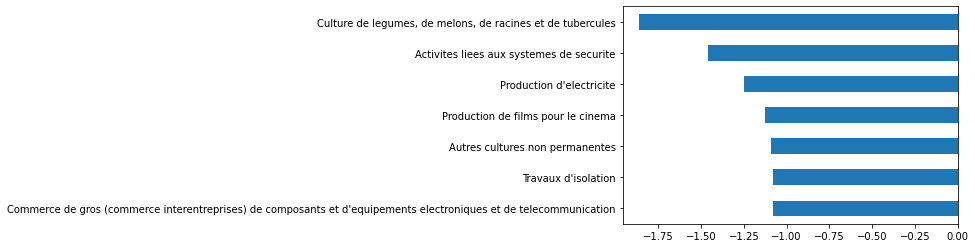

In [57]:
coef_bad.plot.barh()

In [58]:
# # plot bad
# # plot param
# nbr_value=len(coef_bad.index.tolist())
# plt.figure(figsize=(10, 5))
# plt.ylabel("Coefficient magnitude")
# plt.xticks(np.arange(1,  1+ nbr_value),
#             coef_bad.index, rotation=60,
#             ha="right")
# #plot
# plt.bar(np.arange(1,1+ nbr_value), coef_bad.values,color="red")

### Selecting the Most Important Features

In [59]:
# # Fit model
# model = LogisticRegression()
# model.fit(X_train, y_train) 

# # Perform Permutation
# permutation_score = permutation_importance(model, X_train, y_train, n_repeats=15) 


In [60]:
# # Unstack results
# importance_df = pd.DataFrame(np.vstack((list_X_encoder,
#                                         permutation_score.importances_mean)).T) 
# importance_df.columns=['feature','score decrease']


# # # Order by importance
# most_important_features = importance_df.sort_values(by="score decrease", ascending = False)
# most_important_features.head(10)